# Space Observations Analysis

The task here is to perform a classification test for the class variables which are: (galaxy, quasar or star) based on the space observations.

The data has been extracted from the Solan Digital Sky Survey RD14,

We have come across with the data, which consist of 10,000 rows observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Importing or calling all necessary models

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DataSet:

Loading / Cleaning / Formatting

In [276]:
df=pd.read_csv('Solan.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [277]:
df.shape

(10000, 18)

The Above data consist of 10000 rows and 18 columns.

In [278]:
#head shows first five rows of the data:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [279]:
#tail shows last five rows of the data:
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [280]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [281]:
#types of the data:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

# Checking missing values:

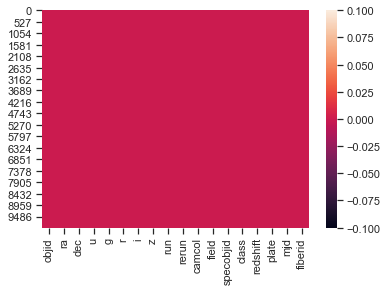

In [282]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).
In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [283]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [284]:
df.describe

<bound method NDFrame.describe of              objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobji

In [285]:
#to review mean, count, minimum and maximum values from the data:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [286]:
df["class"].value_counts().sort_index()

GALAXY    4998
QSO        850
STAR      4152
Name: class, dtype: int64

We have almost 50% of the class belongs to galaxy and a limited amount of 850 belongs to qso class. 

We can see that our data is undergoing with overfitting so we will be removing some of the colums from it , as they are not in use to detect the target variables.
It is going to affect our data in modeling the models.

I am going to remove objid and specobjid where as features related to the camera that is: run, rerun, camcol, field

In [287]:
df.drop(["objid","specobjid","run","rerun","camcol","field"], axis = 1, inplace = True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


In [288]:
#New shape of the data after removing the columns:
df.shape

(10000, 12)

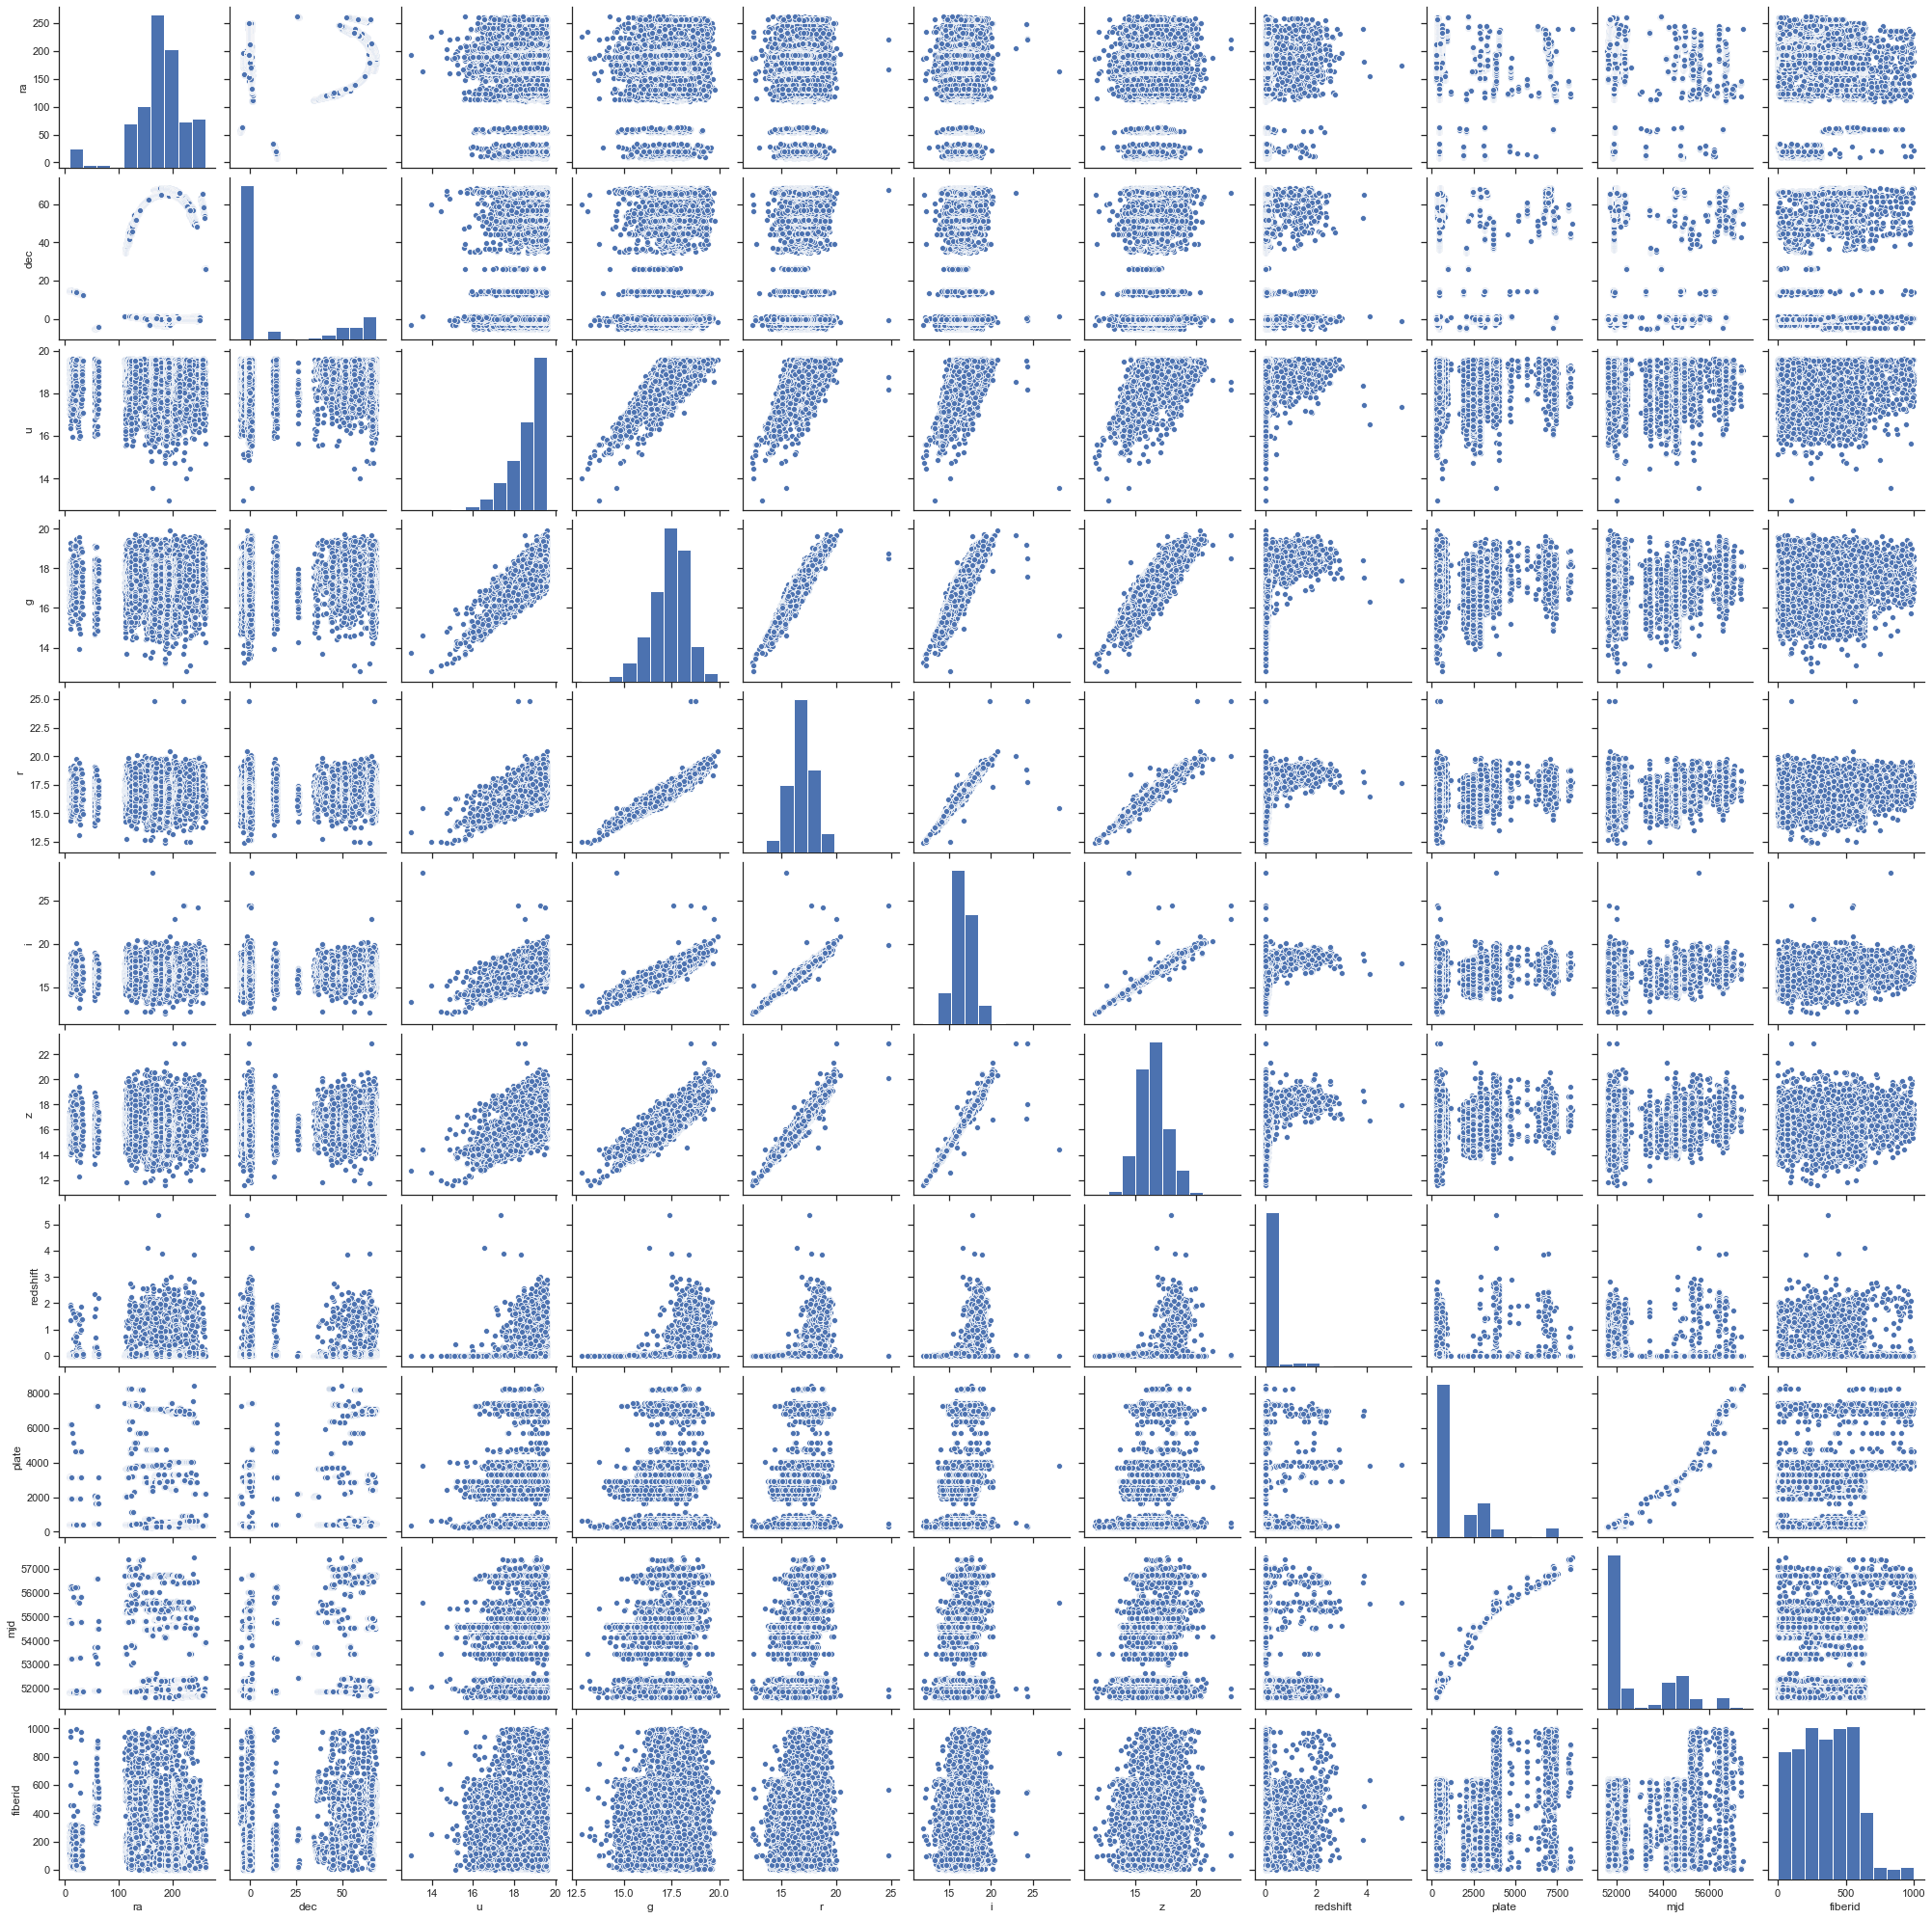

In [289]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are :'plate', 'mjd', 'fiberid','ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift'.

These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation. There are field which are negative relationship, hence we will be removing "objid","specobjid" .

We have already removed these fields from the data.

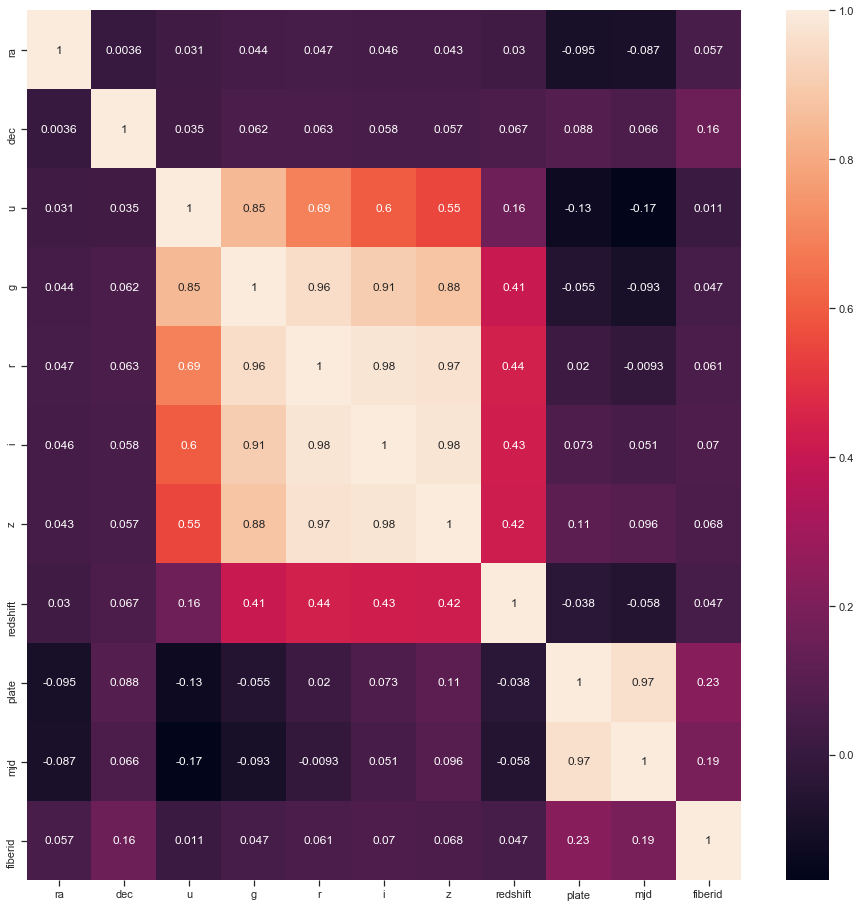

In [290]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [291]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['plate', 'mjd', 'fiberid'], dtype='object'),
 dtype('float64'): Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object'),
 dtype('O'): Index(['class'], dtype='object')}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe591e82390>,
      dtype=object)

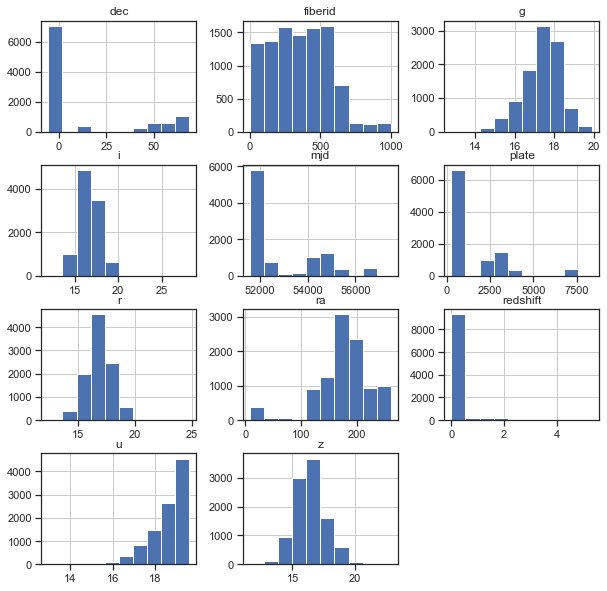

In [292]:
df.hist(figsize=(10,10))

We have plotted the itogram for all the dataset , in which it shows the count with respect to the range where the numbers are falling in.

As we can see redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum, here more than 90% of the data lies in the range from 0 to 1.


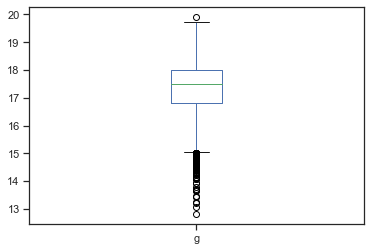

In [293]:
df['g'].plot.box()

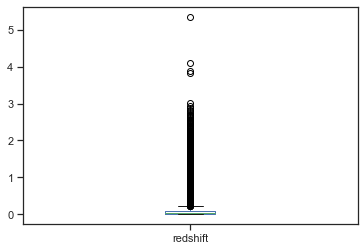

In [294]:
df['redshift'].plot.box()

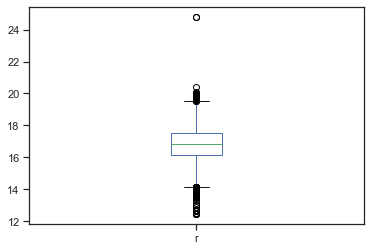

In [295]:
df['r'].plot.box()

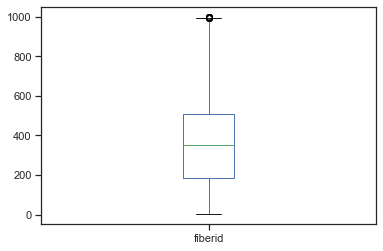

In [296]:
df['fiberid'].plot.box()

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as r,g,redshift,fiberid.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

ra             AxesSubplot(0.125,0.536818;0.065678x0.343182)
dec         AxesSubplot(0.203814,0.536818;0.065678x0.343182)
u           AxesSubplot(0.282627,0.536818;0.065678x0.343182)
g           AxesSubplot(0.361441,0.536818;0.065678x0.343182)
r           AxesSubplot(0.440254,0.536818;0.065678x0.343182)
i           AxesSubplot(0.519068,0.536818;0.065678x0.343182)
z           AxesSubplot(0.597881,0.536818;0.065678x0.343182)
redshift    AxesSubplot(0.676695,0.536818;0.065678x0.343182)
plate       AxesSubplot(0.755508,0.536818;0.065678x0.343182)
mjd         AxesSubplot(0.834322,0.536818;0.065678x0.343182)
fiberid           AxesSubplot(0.125,0.125;0.065678x0.343182)
dtype: object

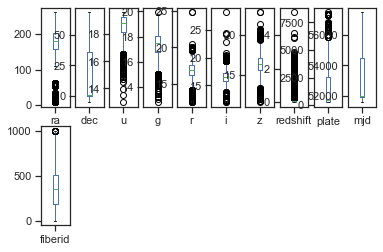

In [297]:
df.plot(kind='box',subplots=True, layout=(2,10))

# Changing the columns:

Bringing the clss column to the first in order to ease our processing.

In [298]:
mid = df['class']
df.drop(labels=['class'], axis=1, inplace = True)
df.insert(0, 'class', mid)
df.head()

,class,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,STAR,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,STAR,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,GALAXY,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,STAR,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,STAR,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512


# Label Encoder

Under object dtype we have only the targeted field that is class , with in class there are 3 variables which have been given no as 0,1,2

In [299]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,class,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,2,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,2,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,0,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,2,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,2,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512


# Removing Outliers:

In [300]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(10000, 12)


In [301]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(8698, 12)


After removing the outliers from the data the shape of the data has change from 10000,12 to 8698,12 which shows that with the z score we are able to remove various rows , Hence our new data shape is (8698,12)

In [302]:
np.where(df1.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

To reduce the error of infinity.

# Assigning X AND Y Variables:

In [303]:
x=df1.iloc[:,1:12]
x.shape
x

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019,447,51877,229


In [304]:
x.shape

(8698, 11)

In [305]:
y=df1.iloc[:,0:1]
y.shape
y.head()


,class
0,2
1,2
2,0
3,2
4,2


In [306]:
y.shape

(8698, 1)

# MODEL SELECTION

Using different types of model in oder to acquire optimum solution:

# Lasso:

In [308]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [309]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.6936040838511718
r2_score corresponding to random state:  43 is:  0.6836394160541097
r2_score corresponding to random state:  44 is:  0.6921992056091479
r2_score corresponding to random state:  45 is:  0.6995284349397759
r2_score corresponding to random state:  46 is:  0.7125534367404522
r2_score corresponding to random state:  47 is:  0.7016772852531459
r2_score corresponding to random state:  48 is:  0.6930608718396165
r2_score corresponding to random state:  49 is:  0.7120196197137513
r2_score corresponding to random state:  50 is:  0.7219961064865442
r2_score corresponding to random state:  51 is:  0.6934914903994991
r2_score corresponding to random state:  52 is:  0.6623989691987879
r2_score corresponding to random state:  53 is:  0.6829837770839935
r2_score corresponding to random state:  54 is:  0.6841627315604257
r2_score corresponding to random state:  55 is:  0.648246659734853
r2_score corresponding to random state:  56 is:  

In [312]:
from sklearn.svm import SVC

In [319]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

# Linear Regression:

In [320]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.6952413973563316
r2_score corresponding to random state:  43 is:  0.6843084914677198
r2_score corresponding to random state:  44 is:  0.6908734969753931
r2_score corresponding to random state:  45 is:  0.7018327141661874
r2_score corresponding to random state:  46 is:  0.7139480342255997
r2_score corresponding to random state:  47 is:  0.7044697524973318
r2_score corresponding to random state:  48 is:  0.6948970263105132
r2_score corresponding to random state:  49 is:  0.7131578338653854
r2_score corresponding to random state:  50 is:  0.7247834075257837
r2_score corresponding to random state:  51 is:  0.69556223362369
r2_score corresponding to random state:  52 is:  0.6647468562363756
r2_score corresponding to random state:  53 is:  0.6857741986861183
r2_score corresponding to random state:  54 is:  0.6831486180357604
r2_score corresponding to random state:  55 is:  0.6440795545255332
r2_score corresponding to random state:  56 is:  0

# Random Forest Classifier

In [321]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [323]:
R_forest= RandomForestClassifier(n_estimators = 100)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'weighted'))

The accuracy of model 2 :  0.9844827586206897
The f1 score of model 2 :  0.9840764907795088


In [349]:
pred_2

array([0, 0, 0, ..., 2, 0, 0])

# KNeighborsRegressor

In [326]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 27}

In [327]:
knn= KNeighborsRegressor(n_neighbors=27)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.5438698241848562
r2_score corresponding to random state:  43 is:  0.5474125781378216
r2_score corresponding to random state:  44 is:  0.5800682385207114
r2_score corresponding to random state:  45 is:  0.5296211524593302
r2_score corresponding to random state:  46 is:  0.5574494581417445
r2_score corresponding to random state:  47 is:  0.5682241521248705
r2_score corresponding to random state:  48 is:  0.5583439512296224
r2_score corresponding to random state:  49 is:  0.561608384522519
r2_score corresponding to random state:  50 is:  0.5540209411782807
r2_score corresponding to random state:  51 is:  0.5304449540682592
r2_score corresponding to random state:  52 is:  0.5316559616359471
r2_score corresponding to random state:  53 is:  0.5303752357546416
r2_score corresponding to random state:  54 is:  0.5537086995916165
r2_score corresponding to random state:  55 is:  0.5170797717507805
r2_score corresponding to random state:  56 is:  

# Errors:

In [328]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  1.0131402456334024
Mean Squared error :  1.5826580527138885
RMSE is :  1.2580373812863783


# Logistic Regression:

In [329]:
lor= LogisticRegression()
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.5438698241848562
r2_score corresponding to random state:  43 is:  0.5474125781378216
r2_score corresponding to random state:  44 is:  0.5800682385207114
r2_score corresponding to random state:  45 is:  0.5296211524593302
r2_score corresponding to random state:  46 is:  0.5574494581417445
r2_score corresponding to random state:  47 is:  0.5682241521248705
r2_score corresponding to random state:  48 is:  0.5583439512296224
r2_score corresponding to random state:  49 is:  0.561608384522519
r2_score corresponding to random state:  50 is:  0.5540209411782807
r2_score corresponding to random state:  51 is:  0.5304449540682592
r2_score corresponding to random state:  52 is:  0.5316559616359471
r2_score corresponding to random state:  53 is:  0.5303752357546416
r2_score corresponding to random state:  54 is:  0.5537086995916165
r2_score corresponding to random state:  55 is:  0.5170797717507805
r2_score corresponding to random state:  56 is:  

# Decision Tree Classifier:

In [334]:
parameters={'criterion':['gini','entropy'],'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier(random_state=10)
clf=GridSearchCV(clf_tree,parameters)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 310}

In [336]:
from scipy.stats import entropy

In [337]:
dtc= DecisionTreeClassifier(random_state=10,criterion=entropy,max_depth=5,min_samples_split=310)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.5438698241848562
r2_score corresponding to random state:  43 is:  0.5474125781378216
r2_score corresponding to random state:  44 is:  0.5800682385207114
r2_score corresponding to random state:  45 is:  0.5296211524593302
r2_score corresponding to random state:  46 is:  0.5574494581417445
r2_score corresponding to random state:  47 is:  0.5682241521248705
r2_score corresponding to random state:  48 is:  0.5583439512296224
r2_score corresponding to random state:  49 is:  0.561608384522519
r2_score corresponding to random state:  50 is:  0.5540209411782807
r2_score corresponding to random state:  51 is:  0.5304449540682592
r2_score corresponding to random state:  52 is:  0.5316559616359471
r2_score corresponding to random state:  53 is:  0.5303752357546416
r2_score corresponding to random state:  54 is:  0.5537086995916165
r2_score corresponding to random state:  55 is:  0.5170797717507805
r2_score corresponding to random state:  56 is:  

# SVC

In [342]:
SVC=SVC
r_state=maxr2_score(SVC,x,y)

r2_score corresponding to random state:  42 is:  0.4054669703872438
r2_score corresponding to random state:  43 is:  0.39005068526866815
r2_score corresponding to random state:  44 is:  0.45762815479907637
r2_score corresponding to random state:  45 is:  0.37795707323005456
r2_score corresponding to random state:  46 is:  0.4151239744224554
r2_score corresponding to random state:  47 is:  0.4307273661118278
r2_score corresponding to random state:  48 is:  0.4042047511925074
r2_score corresponding to random state:  49 is:  0.4091220335020126
r2_score corresponding to random state:  50 is:  0.4170698206441843
r2_score corresponding to random state:  51 is:  0.36964045211995145
r2_score corresponding to random state:  52 is:  0.36025765262497844
r2_score corresponding to random state:  53 is:  0.3778086798583865
r2_score corresponding to random state:  54 is:  0.4135308634322661
r2_score corresponding to random state:  55 is:  0.3664518811057993
r2_score corresponding to random state:  56

In [343]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for Logistic Regression: ",cross_val_score(lor,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Logistic Regression: ",cross_val_score(lor,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for dtc: ",cross_val_score(clf_tree,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for dtc: ",cross_val_score(clf_tree,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest ",cross_val_score(R_forest,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst ",cross_val_score(R_forest,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for SVC ",cross_val_score(SVC,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation r2 score for SVC ",cross_val_score(SVC,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.6825569329112909
Standard Deviation r2 score for Linear Regression:  0.035711658246445045


Mean r2 score for Logistic Regression:  0.407207671722236
Standard Deviation r2 score for Logistic Regression:  0.08180028385842744


Mean r2 score for knn:  0.5309505720752808
Standard Deviation r2 score for knn:  0.038081611037115895


Mean r2 score for dtc:  0.9705081143536642
Standard Deviation r2 score for dtc:  0.013183813745204269


Mean r2 score for R_forest  0.9795143057667006
Standard Deviation r2 score for R_forst  0.007747776910757618


Mean r2 score for lasso  0.6820955079182681
Standard Deviation r2 score for lasso  0.035134218322143924


Mean r2 score for SVC  0.40522913989805087
Standard Deviation r2 score for SVC  0.08572570905923206


# Choosing A Model

In above all the models I am going to choose Random Forest Regressor as the best and final model for the production or prediction of the given datasets.

I am going to choose this model as it is predicting the accuracy score of 98.44% where as cross_val_score shows almost 98% which is grater than any other model which have been tested above, there is only 1 model Decision tree classifier cross_val_score is showing 97% which is nearest to the Random forest regressor but Dtc is still less than R_forest.

Hence I am choosing Random Forest Regressor Model

# Saving The File:

In [344]:
from sklearn.externals import joblib

In [345]:
joblib.dump(R_forest,'Project_8_Space_Observations_analysis.obj')

['Project_8_Space_Observations_analysis.obj']

In [347]:
##loading back the model:
model=joblib.load('Project_8_Space_Observations_analysis.obj')

In [348]:
#Pridicting x_test with RandomForestRegressor = R_forest
R_forest.predict(x_test)

array([0, 0, 0, ..., 2, 0, 0])